<a href="https://colab.research.google.com/github/Johnny-DF26/Machine_Learning/blob/master/Breast_Cancer_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Base de Dados

In [56]:
entrada = pd.read_csv('/content/entradas_breast.csv')
saida = pd.read_csv('/content/saidas_breast.csv')

In [57]:
dados = pd.concat([entrada, saida], axis=1)
dados.rename(columns={'0':'diagnostics'}, inplace=True)

dados.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnostics
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678,0


# Visualização dos dados

In [58]:
dados.isnull().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
diagnostics                 0
dtype: int64

In [59]:
dados.diagnostics.value_counts()

1    357
0    212
Name: diagnostics, dtype: int64

<AxesSubplot:xlabel='diagnostics', ylabel='count'>

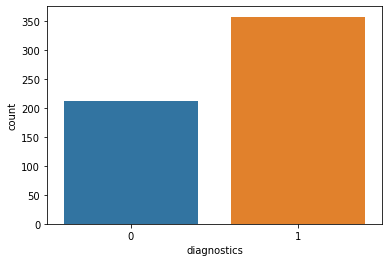

In [60]:
sns.countplot(x=dados.diagnostics)

# Divisao dos Dados

In [61]:
X = dados.drop('diagnostics', axis=1)
y = dados.diagnostics

X.shape, y.shape

((569, 30), (569,))

# Balanceamento dos Dados

In [62]:

smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)

X.shape, y.shape

((714, 30), (714,))

# Treinamento dos Dados

In [ ]:

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)

modelo = Sequential()
modelo.add(Dense(units=16, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(.2))
modelo.add(Dense(units=16, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(.2))
modelo.add(Dense(units=1, activation='sigmoid'))
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
modelo.fit(X_treino,y_treino, batch_size=10, epochs=100)

In [47]:
modelo.evaluate(X_teste, y_teste)

5/5 [==============================] - 0s 5ms/step - loss: 0.1744 - binary_accuracy: 0.9301


[0.17443424463272095, 0.9300699234008789]

#Tunnig - RandomSearch

In [76]:
from keras.wrappers.scikit_learn import KerasClassifier

def rede_neural(neuronios,ativacao, kernel, otimizador):
    modelo = Sequential()
    modelo.add(Dense(units=neuronios,input_shape=(30,), activation=ativacao, kernel_initializer=kernel))
    modelo.add(Dropout(.2))
    modelo.add(Dense(units=neuronios, activation=ativacao, kernel_initializer=kernel))
    modelo.add(Dropout(.2))
    modelo.add(Dense(units=1, activation='sigmoid'))
    modelo.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['binary_accuracy'])
    return modelo

modelo = KerasClassifier(build_fn=rede_neural)
parametros = {'neuronios':range(8,16), 'ativacao': ['relu','tanh'], 'kernel':['normal', 'random_uniform'],
              'otimizador':['adam', 'sgd'], 'batch_size':range(5,10), 'epochs':range(50,150)}

random = RandomizedSearchCV(estimator=modelo, param_distributions=parametros, n_iter=2, scoring='accuracy', cv=5)
random = random.fit(X, y)

Epoch 1/131


<ipython-input-76-f6e88f6bca4d>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=rede_neural)


82/82 [==============================] - 1s 2ms/step - loss: 0.8858 - binary_accuracy: 0.5622
Epoch 2/131
82/82 [==============================] - 0s 2ms/step - loss: 0.6082 - binary_accuracy: 0.5972
Epoch 3/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5733 - binary_accuracy: 0.6182
Epoch 4/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5675 - binary_accuracy: 0.6025
Epoch 5/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5333 - binary_accuracy: 0.6462
Epoch 6/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5298 - binary_accuracy: 0.6532
Epoch 7/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5180 - binary_accuracy: 0.6480
Epoch 8/131
82/82 [==============================] - 0s 2ms/step - loss: 0.4922 - binary_accuracy: 0.6708
Epoch 9/131
82/82 [==============================] - 0s 2ms/step - loss: 0.4598 - binary_accuracy: 0.7268
Epoch 10/131
82/82 [==============================] - 0s 2

In [77]:
melhores_param = random.best_params_
melhores_param

{'otimizador': 'adam',
 'neuronios': 8,
 'kernel': 'random_uniform',
 'epochs': 131,
 'batch_size': 7,
 'ativacao': 'relu'}

In [78]:
melhor_score = random.best_score_
melhor_score

0.8936373485669261

# Validaçao Cruzada

In [79]:
from scikeras.wrappers import KerasClassifier

def rede_neural():
    modelo = Sequential()
    modelo.add(Dense(units=8,input_shape=(30,), activation='relu', kernel_initializer='random_uniform'))
    modelo.add(Dropout(.2))
    modelo.add(Dense(units=8, activation='relu', kernel_initializer='random_uniform'))
    modelo.add(Dropout(.2))
    modelo.add(Dense(units=1, activation='sigmoid'))
    modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    return modelo

modelo = KerasClassifier(model=rede_neural, batch_size=7, epochs=131)
cross = cross_val_score(modelo, X, y, scoring='accuracy', cv=5)

cross

Epoch 1/131
82/82 [==============================] - 1s 2ms/step - loss: 0.8615 - binary_accuracy: 0.6165
Epoch 2/131
82/82 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6865
Epoch 3/131
82/82 [==============================] - 0s 2ms/step - loss: 0.6400 - binary_accuracy: 0.6532
Epoch 4/131
82/82 [==============================] - 0s 2ms/step - loss: 0.6035 - binary_accuracy: 0.6865
Epoch 5/131
82/82 [==============================] - 0s 2ms/step - loss: 0.6160 - binary_accuracy: 0.6620
Epoch 6/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5874 - binary_accuracy: 0.6602
Epoch 7/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5781 - binary_accuracy: 0.6970
Epoch 8/131
82/82 [==============================] - 0s 2ms/step - loss: 0.5492 - binary_accuracy: 0.7040
Epoch 9/131
82/82 [==============================] - 0s 3ms/step - loss: 0.5586 - binary_accuracy: 0.7180
Epoch 10/131
82/82 [==========================

array([0.88811189, 0.91608392, 0.93006993, 0.92307692, 0.9084507 ])

In [82]:
cross.mean(), cross.std()

(0.9131586723136019, 0.014439014859664433)